In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
labels_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_classes = 10

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
# built-in mnist digit dataset.
data = keras.datasets.mnist
print(data)
print(type(data))

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>
<class 'module'>


In [5]:
# we seperate the data into parts. 60000 train samples and 10000 test samples.
(x_train, y_train), (x_test, y_test) = data.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

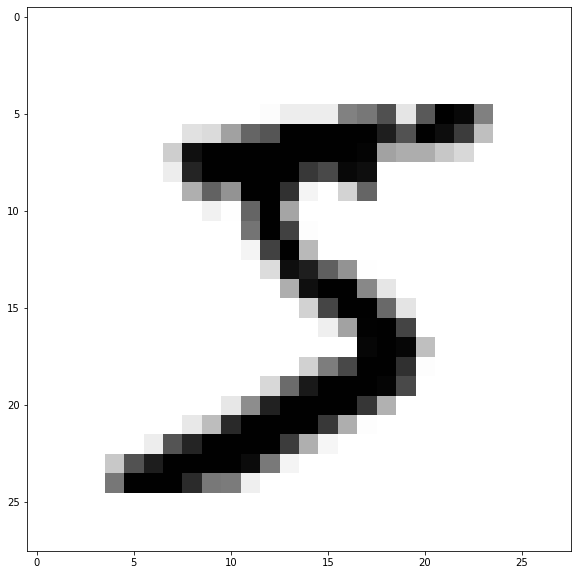

In [ ]:
# we show part the data:
print(x_train[0])
print(f'The actual Label is: {y_train[0]}')
plt.imshow(x_train[0], cmap=plt.cm.binary) # the image isn't colored, but black-n-white.
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

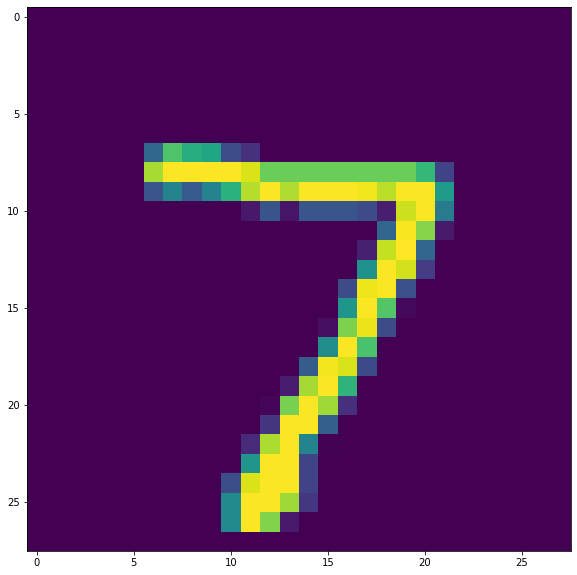

In [ ]:
# we show part the data:
print(x_test[0])
print(f'The actual Label is: {y_test[0]}')
plt.imshow(x_test[0])
plt.show()

In [9]:
# we show the distribution in labels belonging to training data.
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [10]:
# we show the distribution in labels belonging to testing data.
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0  980]
 [   1 1135]
 [   2 1032]
 [   3 1010]
 [   4  982]
 [   5  892]
 [   6  958]
 [   7 1028]
 [   8  974]
 [   9 1009]]


In [ ]:
# we have to normalize the data, so the time taken for training would be low.
# first approach:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

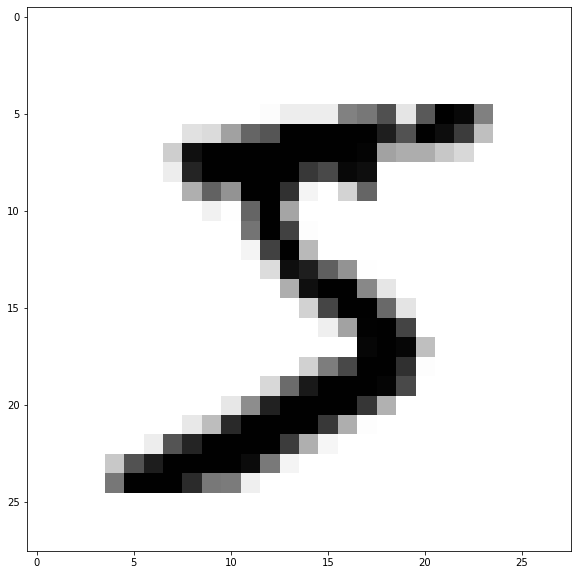

In [ ]:
print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary) # the image isn't colored, but black-n-white.
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

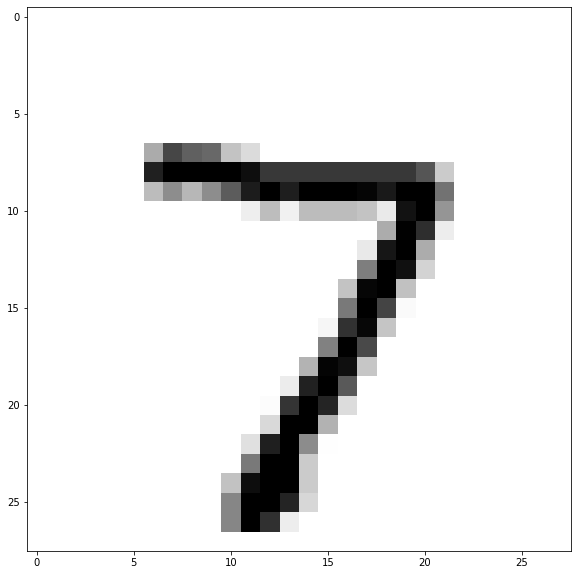

In [ ]:
print(x_test[0])
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
# we have to normalize the data, so the time taken for training would be low.
# second approach:
x_train = utils.normalize(x_train, axis=1)
x_test = utils.normalize(x_test, axis=1)

In [ ]:
print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary) # the image isn't colored, but black-n-white.
plt.show()

In [ ]:
print(x_test[0])
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
# we have to reshape our train/test data in order for our model to work.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# we have to categorize our labels so the model would work easily. not essential, but, better.
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
# after preporcessing, we create our model:
model = keras.Sequential()

# first complex (containing three layers):
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# second complex (containing three layers):
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# third complex (containing three layers):
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# tenth layer:
model.add(Flatten()) # since the output of convolution layers is multi-dimensional, we need this layer to flatten the results before going on in our network..

# eleventh layer:
model.add(Dense(128, activation='relu'))

# twelfth layer:
model.add(Dense(num_classes, activation='softmax'))

# we then compile our model, ready to be used.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# a summary of the architecture of our neural network.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          1

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.15, batch_size=8, epochs=5)

Epoch 1/5
6375/6375 [==============================] - 42s 6ms/step - loss: 0.4726 - accuracy: 0.8427 - val_loss: 0.0600 - val_accuracy: 0.9817
Epoch 2/5
6375/6375 [==============================] - 36s 6ms/step - loss: 0.1168 - accuracy: 0.9640 - val_loss: 0.0399 - val_accuracy: 0.9880
Epoch 3/5
6375/6375 [==============================] - 36s 6ms/step - loss: 0.0972 - accuracy: 0.9702 - val_loss: 0.0417 - val_accuracy: 0.9889
Epoch 4/5
6375/6375 [==============================] - 36s 6ms/step - loss: 0.0818 - accuracy: 0.9753 - val_loss: 0.0400 - val_accuracy: 0.9882
Epoch 5/5
6375/6375 [==============================] - 36s 6ms/step - loss: 0.0791 - accuracy: 0.9759 - val_loss: 0.0401 - val_accuracy: 0.9888


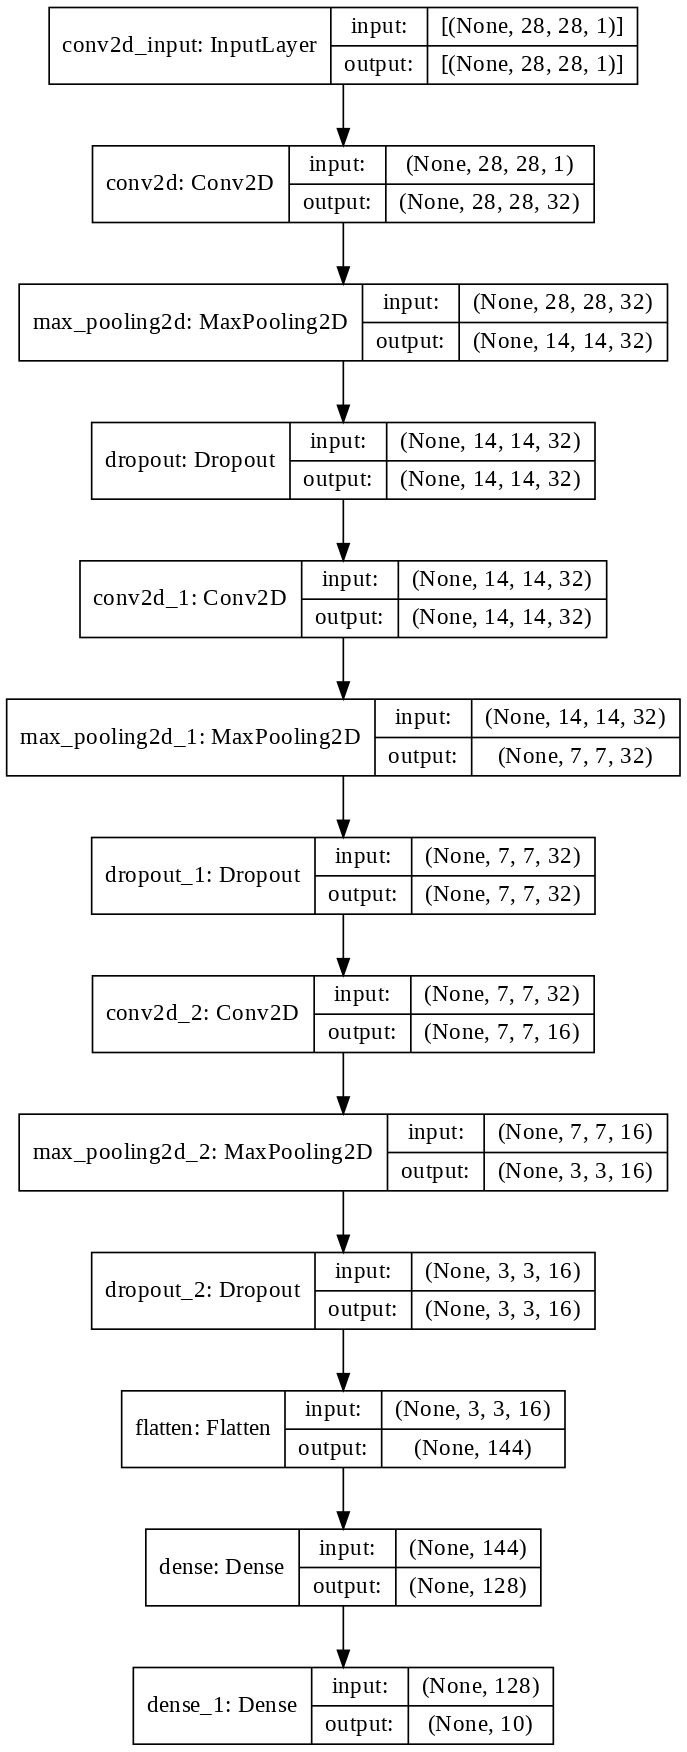

In [ ]:
utils.plot_model(model, show_shapes=True, dpi=120)

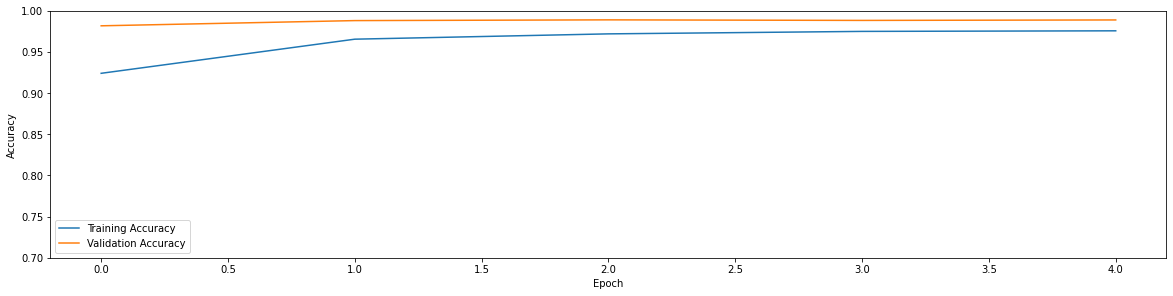

In [ ]:
# we evaluate our model:
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')
plt.show()

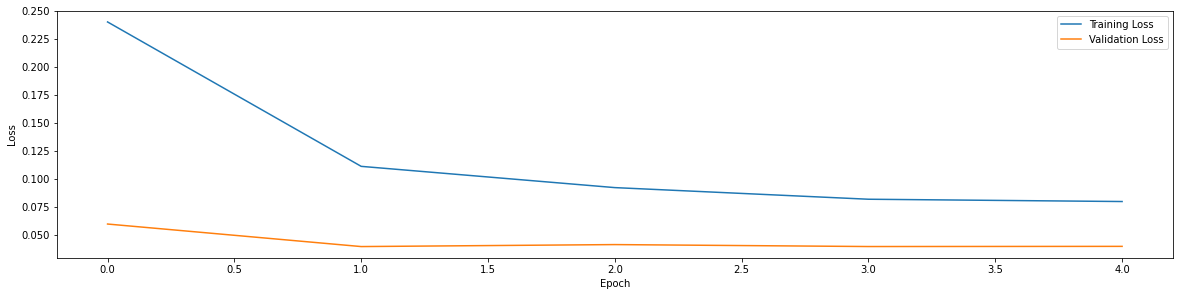

In [ ]:
# we evaluate our model:
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
# accuracy score:
_, accuracy = model.evaluate(x_test, y_test, verbose=2)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
print(accuracy)

313/313 - 1s - loss: 0.0304 - accuracy: 0.9905
0.9904999732971191


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
# precision score:
precision = precision_score(y_test, predictions, average='macro')
print(f'Precision: {precision}')

Precision: 0.9906358155888542


In [ ]:
# recall score:
recall = recall_score(y_test, predictions, average='macro')
print(f'Recall: {recall}')

Recall: 0.9903432531522794


In [ ]:
# f1-score score:
f1 = f1_score(y_test, predictions, average='macro')
print(f'f1-score: {f1}')

f1-score: 0.9904622769236029


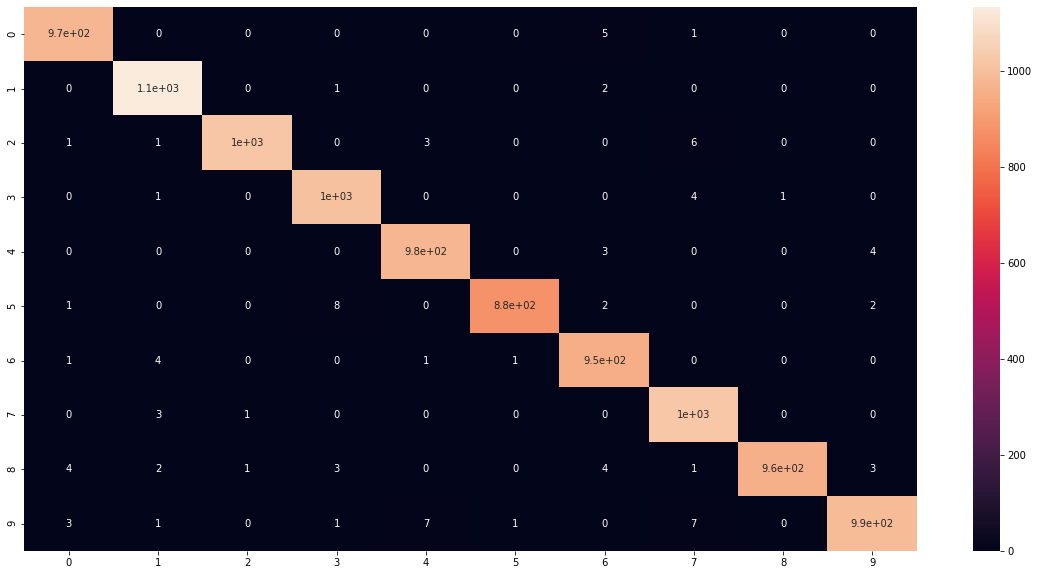

In [ ]:
# confusion matrix:
cm = confusion_matrix(y_test, predictions, labels=labels_numbers)
df_cm = pd.DataFrame(cm, index=labels_numbers, columns=labels_numbers)
sn.heatmap(df_cm, annot=True)
plt.show()